In [1]:
from sympy import *
from dtumathtools import *

init_printing()

# Solution Suggestion for HW2

**_Assignment 2 in Mathematics 1b_**

**By David Thomas Hart**
*DTU Compute*

> If you have any questions/corrections/improvements - davidthart03@gmail.com

Note that the following answers are not representative of the “perfect” or “ideal” student solution. It is only meant to show correct solutions or at least example methods to the questions.

## Problem 1

A function $f:\mathbb{R}\rightarrow\mathbb{R}$ is given by the expression

\begin{equation*}
    f(x)=\cos(3x).
\end{equation*}

### a)

We want to find the approximating polynomial $P_{4,f,x_0}$ with expansion point $x_0=0$. In other words, the 4th order Taylor polynomial. We first need to find the derivatives evaluated at $x_0=0$:

\begin{equation*}
    f(x)=\cos(3x)\Rightarrow f(0)=1
\end{equation*}
\begin{equation*}
    f'(x)=-3\sin(3x)\Rightarrow f'(0)=0
\end{equation*}
\begin{equation*}
    f''(x)=-9\cos(3x)\Rightarrow f''(0)=-9
\end{equation*}
\begin{equation*}
    f'''(x)=27\sin(3x)\Rightarrow f'''(0)=0
\end{equation*}
\begin{equation*}
    f^{(4)}(x)=81\cos(3x)\Rightarrow f^{(4)}(0)=81
\end{equation*}

So, naturally when we use this in the definition of Taylor polynomials in Definition 4.2.1, we get

\begin{equation*}
    P_{4,f,0}(x)=1-\frac{9}{2}x^2+\frac{27}{8}x^4
\end{equation*}

We can verify this:

In [2]:
x = symbols('x')
def P(f,x0,n):
    return f.series(x,x0,n+1).removeO()
f = cos(3*x)
P(f,0,4)

Alternatively, one could use the well known Maclaurin series for $\cos{(y)}$ and substitute $y=3x$, giving the same thing.

### b)

The value of $\cos(\frac12)$ can be approximated with this Taylor polynomial by using $x=\frac16$, since our Taylor approximation is for $\cos{(3x)}$, so $3x=\frac{1}{2}\Rightarrow x=\frac{1}{6}$. Computing $\cos{(\frac{1}{2})}\approx P_{4,f,0}(\frac{1}{6})$:

In [3]:
P(f,0,4).subs(x,1/6)

We will now estimate the error that is incurred here, for which we need:

\begin{equation*}
    f^{(5)}(x)=-243\sin{(3x)}
\end{equation*}

Using the fact that $\sin(t)\leq1$ for any $t$, we estimate the error by use of the remainder term:

$$\left|R\left(\frac16\right)\right| = \left|\frac{f^{(5)}(\xi)}{5!}\cdot\left(\frac16-0\right)^5\right|=\left|\frac{-243\sin(3\xi)}{5!}\left(\frac16\right)^5\right|\leq\left|\frac{-243\cdot1}{5!}\left(\frac16\right)^5\right|=\frac{243}{5!\cdot 6^5}$$

In [4]:
243./(factorial(5)*6**5)

So, the maximum incurred error is no larger than $0.026\,\%$.

An even better error estimate is found by considering $\xi\in[x_0,x]=[0,\frac16]$. This shows that $\sin(3\xi)\in[\sin(0),\sin(\frac12)]$, and in this interval we have $\sin(t)<t$. So, using $\sin(3\xi)\leq\frac12$ we have:

$$\left|R\left(\frac16\right)\right| =\left|\frac{-243\sin(3\xi)}{5!}\left(\frac16\right)^5\right|\leq\left|\frac{-243\cdot\frac12}{5!}\left(\frac16\right)^5\right|=\frac{243}{5!\cdot 6^5\cdot 2}$$

In [5]:
243./(factorial(5)*6**5*2)

So, the maximum incurred error is no larger than $0.013\,\%$.

As a check, we can find the absolute and relative errors of this approximation using a computer value for $\cos(\frac12)$:

In [6]:
abs(cos(1/2)-P(f,0,4).subs(x,1/6)),100*abs(cos(1/2)-P(f,0,4).subs(x,1/6))/abs(cos(1/2))

So, $|(\cos{(\frac{1}{2})}-P_{4,f,0}(\frac{1}{6}))|\approx2.16\cdot10^{-5}$ and the computer-evaluated percentage error is $2.46\cdot10^{-3}\:\%$, which is within bounds of the estimated error above.

### c)

We are informed that a function $g$ has the following properties:

\begin{equation*}
    g(0)=1\:\:\text{and}\:\:g^{(n)}(0)=
\begin{cases}
    (-1)^{\frac{n}{2}}2^n & n\:\text{is even}, \\
    0 & n\:\text{is odd}.
\end{cases}
\end{equation*}

We can use this to quite easily find $P_{7,g,x_0}$ with expansion point $x_0=0$. We know that odd $n$ will have no contribution, and therefore:

\begin{equation*}
    P_{7,g,0}(x)=g(0)+\frac{g''(0)}{2!}x^2+\frac{g^{(4)}(0)}{4!}x^4+\frac{g^{(6)}(0)}{6!}x^6 = 1 - \frac{4}{2}x^2+\frac{16}{24}x^4-\frac{64}{720}x^6
\end{equation*}

Which can be reduced to:

\begin{equation*}
    P_{7,g,0}(x)= 1 - 2x^2+\frac{2}{3}x^4-\frac{4}{45}x^6
\end{equation*}

This pattern looks quite similar to the function in question a), but instead of $3^n$ and an alternating sign, it is $2^n$. The function in question is $g(x)=\cos{(2x)}$. We can double check:

In [7]:
g=cos(2*x)
P(g,0,7)

## Problem 2

Let $B$ be the set $B=\{(x_1,x_2)\in\mathbb{R}^2|x_1^2+x_2^2\leq1\wedge x_1\geq0\}$. This is the filled semicircle of radius $r=1$ encompassing the 1st and 4th quadrant, $\theta\in[-\frac{\pi}{2},\frac{\pi}{2}]$, if looking at the $(x_1,x_2)$-plane. A function $f:B\rightarrow\mathbb{R}$ is given by

\begin{equation*}
    f(x_1,x_2)=x_1^2x_2^2+3x_1x_2+x_2-4
\end{equation*}

To find the image of this function, we want to find the global maximum and minimum. The function consists of elementary functions that are differentiable everwhere and so there are no exceptional points. This means we only need to investigate the boundary and potential stationary points. The stationary point can be found manually quite simply or with the following:

In [8]:
x1,x2 = symbols('x1 x2')
V = Matrix([x1,x2])
f=x1**2*x2**2+3*x1*x2+x2-4
g = dtutools.gradient(f,V)
eq = Eq(g[0],0),Eq(g[1],0)
solve(eq)

So, the only stationary point is $\left(-\frac{1}{3},0\right)$. This has the function value:

In [9]:
f.subs({x1:-1/3,x2:0})

To investigate the boundary, we can make some restrictions on the functions, using parametrisation. There are two segments of the boundary, notably the diameter and the semicircular arc. They can each be parameterised in the following ways:

\begin{equation*}
    \boldsymbol{r}_1(u)=\left(\begin{matrix}0\\u\end{matrix}\right),u\in[-1,1]
\end{equation*}

\begin{equation*}
    \boldsymbol{r}_2(u)=\left(\begin{matrix}\cos{(u)}\\\sin{(u)}\end{matrix}\right),u\in\left[-\frac{\pi}{2},\frac{\pi}{2}\right]
\end{equation*}

We start by investigating the diameter:

\begin{equation*}
    f(\boldsymbol{r}_1(u))=u-4
\end{equation*}

The lowest value this takes in when $u=-1$ and the highest is when $u=1$, giving $-5$ and $-3$ respectively. Then for the semicircular arc:

\begin{equation*}
    f(\boldsymbol{r}_2(u))=\cos^2(u)\sin^2(u)+3\cos(u)\sin(u)+\sin(u)-4
\end{equation*}

We can find the maxima and minima along this restriction:

In [10]:
u = symbols('u',real=True)
fa = cos(u)**2*sin(u)**2+3*cos(u)*sin(u)+sin(u)-4
S = solve(fa.diff(u),u)
N(S[0]),N(S[1]),N(S[2]),N(S[3])

Where only $-0.933$ and $0.867$ are within our interval of $u$. We can visualise this:

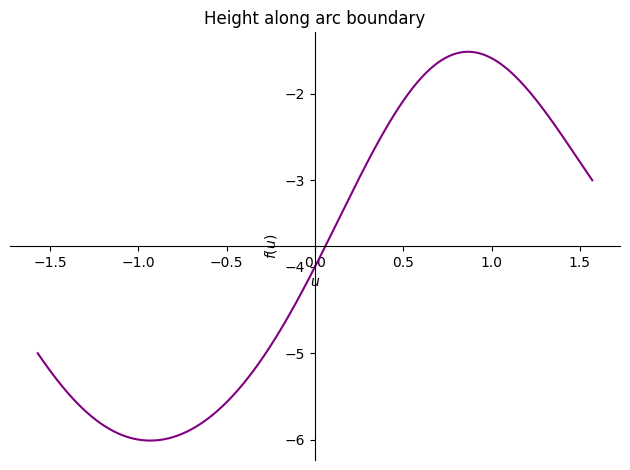

In [11]:
p = plot(fa,(u,-pi/2,pi/2),show=False,title="Height along arc boundary")
p[0].line_color = 'purple'
p.show()

We can also add the boundaries to the 3D plot and visualise further:

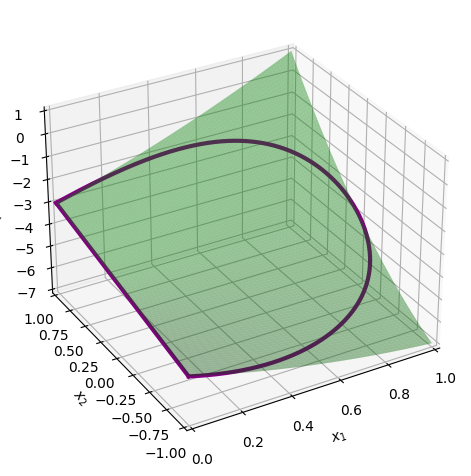

In [12]:
pf = dtuplot.plot3d(f,(x1,0,1),(x2,-1,1),show=False,rendering_kw={"alpha":0.4,"color":"green"})
l1 = dtuplot.plot3d_parametric_line(0,u,f.subs({x1:0,x2:u}),(u,-1,1),
                                    use_cm=False,show=False,rendering_kw={"color":"purple","linewidth":3})
l2 = dtuplot.plot3d_parametric_line(cos(u),sin(u),f.subs({x1:cos(u),x2:sin(u)}),(u,-pi/2,pi/2),
                                    use_cm=False,show=False,rendering_kw={"color":"purple","linewidth":3})
combined = (pf+l1+l2)
combined.camera = {"azim" : -120, "elev" : 30}
combined.legend = False
combined.show()

We can use the semicircular arc boundary minimum and maximum $u$ values to find the height at those points.

In [13]:
fa.subs(u,N(S[1])),fa.subs(u,N(S[2]))

So, our maximum function value along the arc is $-1.51$ and the minimum is $-6.01$. Not only are this the extrema along the arc, but the lower bound here is the global minimum of $f$ and the upper bound is the global maximum of $f$. Therefore:

\begin{equation*}
    \text{im}(f)=[-6.01,-1.51]
\end{equation*}

At least rounded to three significant figures.

## Problem 3

A function $f:\mathbb{R}^2\rightarrow\mathbb{R}$ is given by

\begin{equation*}
    f(x_1,x_2)=x_1^2-2x_1+3x_2^5-5x_2^3.
\end{equation*}

### a)

To determine the stationary points of $f$, we need to set the gradient equal to $\boldsymbol{0}$ and solve for $x_1$ and $x_2$.

In [14]:
x1,x2 = symbols('x1 x2')
f=x1**2-2*x1+3*x2**5-5*x2**3
g=Matrix([diff(f,x1),diff(f,x2)])
eq = Eq(g[0],0),Eq(g[1],0)
solve(eq)

### b)

To determine whether the stationary points are local minima, maxima or just saddle points, we can use the Hessian matrix evaluated at the stationary points and use Theorem 5.2.4.

In [15]:
def HessianEval(f,y1,y2):
    V = Matrix([x1,x2])
    return hessian(f,V).subs({x1:y1,x2:y2})
HessianEval(f,1,-1),HessianEval(f,1,0),HessianEval(f,1,1)

⎛⎡2   0 ⎤  ⎡2  0⎤  ⎡2  0 ⎤⎞
⎜⎢      ⎥, ⎢    ⎥, ⎢     ⎥⎟
⎝⎣0  -30⎦  ⎣0  0⎦  ⎣0  30⎦⎠

The point at $(x_1,x_2)=(1,-1)$ is a saddle point as we have both a positive and a negative eigenvalue. We also see that the point $(x_1,x_2)=(1,1)$ is a strict local minimum as there are only positive eigenvalues. We need to do a special investigation on the last point $(1,0)$ since $0$ is an eigenvalue in that case and the Hessian matrix thus does not give us any conclusion.

We restrict the function to a chosen straight line $x_1=1$:

In [16]:
h=f.subs(x1,1)
h

We find all stationary points along this restriction:

In [17]:
k=diff(h,x2)
solveset(Eq(k,0))

There are three stationary points along this restriction, the one at $x_2=0$ coinciding with the $(1,0)$ we are investigating. The function value at this point as well as of chosen points within the subintervals on either side are computed:

In [18]:
h.subs(x2,-1/2),h.subs(x2,0),h.subs(x2,1/2)

Since this restriction is continuous and with no exceptional points, and since there are no further stationary points within the subintervals $[-\frac12,0[$ and $]0,\frac12]$, we conclude that the restriction is locally increasing from $x_2=0$ in the positive direction (for greater values of $x_2$) and locally decreasing in the negative direction (for smaller values of $x_2$). The stationary point is thus a saddle point along this restriction, and hence $(1,0)$ is a saddle point on $f$.

The function values at all points are:

In [19]:
f.subs({x1:1,x2:-1}),f.subs({x1:1,x2:0}),f.subs({x1:1,x2:1})

We can quickly plot them on $f$:

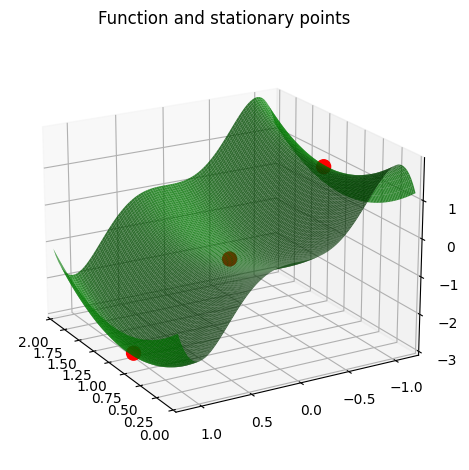

In [20]:
SPs = {(1,-1),(1,0),(1,1)}
Points = [Matrix([x0,y0,f.subs({x1:x0,x2:y0})]) for (x0,y0) in SPs]
pS1=dtuplot.scatter(Points,show=False,rendering_kw={"s" : 100,"color":"red"})
pf = dtuplot.plot3d(f,(x1,0,2),(x2,-1.2,1.2),show=False,rendering_kw={"alpha":0.8,"color":"green"})
combined = (pS1+pf)
combined.camera = {"azim" : 150, "elev" : 20}
combined.legend = False
combined.title = "Function and stationary points"
combined.show()

### c)

We can now plot the function $f$ along with its second degree Taylor polynomial with the three different expansion points, corresponding to the stationary points.

In [21]:
def evaluateFunction(f,x,x0):
    for i in range(len(x)):
        f = f.subs({x[i]:x0[i]})
    return f
def taylorN(f,x,x0):
    N = len(x)
    const = evaluateFunction(f,x,x0)
    J = Matrix([f]).jacobian(x).T
    J0 = evaluateFunction(J,x,x0)
    first = J0.T*(x-x0)
    H = hessian(f,x)
    H0 = evaluateFunction(H,x,x0)
    second = 1/2*(x-x0).T*H0*(x-x0)
    Pk = simplify(Matrix([const]) + first + second)[0]
    return Pk

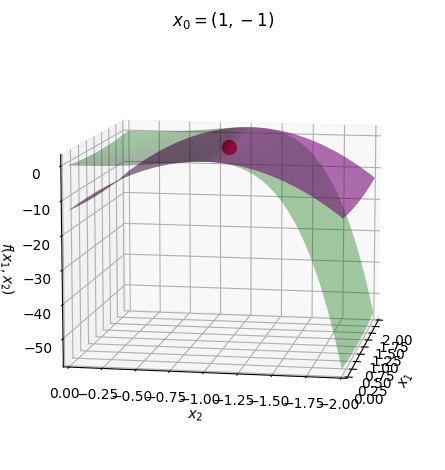

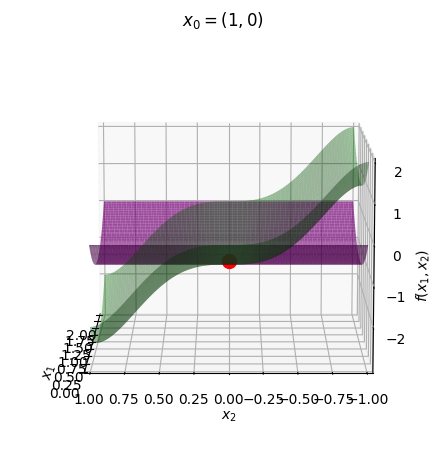

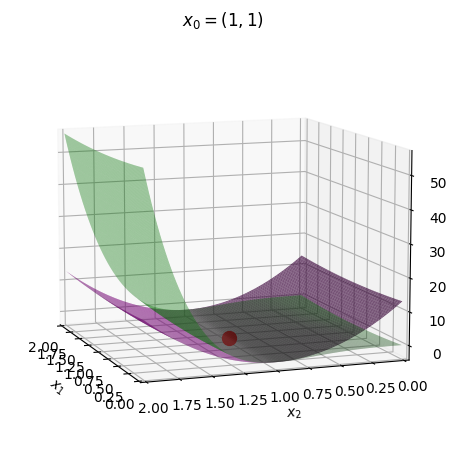

In [22]:
SPs=nonlinsolve
P1 = taylorN(f,V,Matrix([1,-1]))
P2 = taylorN(f,V,Matrix([1,0]))
P3 = taylorN(f,V,Matrix([1,1]))
pP1 = dtuplot.plot3d(P1,(x1,0,2),(x2,-2,0),show=False,rendering_kw={"alpha":0.7,"color":"purple"})
pP2 = dtuplot.plot3d(P2,(x1,0,2),(x2,-1,1),show=False,rendering_kw={"alpha":0.7,"color":"purple"})
pP3 = dtuplot.plot3d(P3,(x1,0,2),(x2,0,2),show=False,rendering_kw={"alpha":0.7,"color":"purple"})
pf1 = dtuplot.plot3d(f,(x1,0,2),(x2,-2,0),show=False,rendering_kw={"alpha":0.4,"color":"green"})
pf2 = dtuplot.plot3d(f,(x1,0,2),(x2,-1,1),show=False,rendering_kw={"alpha":0.4,"color":"green"})
pf3 = dtuplot.plot3d(f,(x1,0,2),(x2,0,2),show=False,rendering_kw={"alpha":0.4,"color":"green"})
pS1 = dtuplot.scatter(Matrix([1,-1,1]),show=False,rendering_kw={"s" : 100,"color":"red"})
pS2 = dtuplot.scatter(Matrix([1,0,-1]),show=False,rendering_kw={"s" : 100,"color":"red"})
pS3 = dtuplot.scatter(Matrix([1,1,-3]),show=False,rendering_kw={"s" : 100,"color":"red"})
combined1 = (pf1+pP1+pS1)
combined1.camera = {"azim" : 190, "elev" : 10}
combined1.legend = False
combined1.title = "$x_0=(1,-1)$"
combined1.show()
combined2 = (pf2+pP2+pS2)
combined2.camera = {"azim" : 180, "elev" : 10}
combined2.legend = False
combined2.title = "$x_0=(1,0)$"
combined2.show()
combined3 = (pf3+pP3+pS3)
combined3.camera = {"azim" : 160, "elev" : 10}
combined3.legend = False
combined3.title = "$x_0=(1,1)$"
combined3.show()

It all looks quite neat. Nice!

# Problem 4

A function $f:[0,5]\rightarrow\mathbb{R}$ is given by the expression $f(x)=2x+3$.

### a)

We want to find the Riemann sum over the interval $[0,5]$ with 30 subintervals, starting with a left Riemann sum.

In [23]:
f = 2*x+3
def LeftSum(f,a,b,J):
    w = (b - a)/J
    x_l = a
    result = 0
    for i in range(J):
        x_r = x_l + w
        result += f.subs(x,x_l)
        x_l = x_r
    result *= w
    return result
LeftSum(f,0,5,30)

In [24]:
def RightSum(f,a,b,J):
    w = (b - a)/J
    x_l = a
    result = 0
    for i in range(J):
        x_r = x_l + w
        result += f.subs(x,x_r)
        x_l = x_r
    result *= w
    return result
RightSum(f,0,5,30)

### b)

In this question, we need to find both the left and right Riemann sums over the previous interval for this specific function, but generalised to $n$ subintervals. Generally, for a left Riemann sum:

\begin{equation*}
    L = f(a)w+f(a+w)w+f(a+2w)w+...+f(a+(n-1)w)w = w\sum^{n-1}_{i=0}f(a+iw)
\end{equation*}

Where $w=\frac{b-a}{n}$. Which for this specific function, is given by:

\begin{equation*}
    L_f(n) = \frac{5}{n}\sum^{n-1}_{i=0}\left(\frac{10}{n}i+3\right) = 15 + \frac{50}{n^2}\sum^{n-1}_{i=1}i = 15 + \frac{50}{n^2} \frac{n(n-1)}{2} = 40 - \frac{25}{n}
\end{equation*}

The exact same can be done for the right Riemann sum, giving:

\begin{equation*}
    R_f(n) = 40 + \frac{25}{n}
\end{equation*}

### c)

The expression for the errors of these approximations can be found in the following way:

\begin{equation*}
    E_L(n) = \left| \int^5_0 (2x+3)\text{d}x - L_f(n) \right| = \frac{25}{n}
\end{equation*}

And the right Riemann sum turns out to have the same error, just as an overestimate instead of underestimate.

\begin{equation*}
    E_R(n) = \frac{25}{n}
\end{equation*}

### d)

It does in fact not matter which point we choose in our subinterval due to the following:

\begin{equation*}
    \lim_{n\rightarrow\infty}(E_L(n)) = \lim_{n\rightarrow\infty}(E_R(n)) = 0
\end{equation*}